# Rannsókn á sjóslysum á Íslandi / Research on Icelandic maritime accidents
## 1950 - 2018

**_Benedikt Óskarsson  
SC-T-498-GAGR  
Háskólinn í Reykjavík_**  


## Formáli / Introduction

**_Icelandic_:**  
Í aldanna rás hafa við Íslandsstrendur allt frá landnámi farist óteljandi sjómenn í sjóslysum í kringum landið. Hverju slysi fylgir sorgarsaga en um leið er margt sem er áhugavert að skoða í þessu samhengi og jákvætt að sjá hversu mikið sjóslysum hefur fækkað og má nefna að árið 2014 var líklega fyrsta ár frá landnámi þar sem enginn fórst í sjóslysi við landið.  
  
Í þessari skýrslu verður skoðað gagnasett sem inniheldur upplýsingar um öll banaslys sem hafa orðið við landið frá árinu 1950. Gagnasettið er fengið frá Hilmari Snorrasyni skólastjóra Slysavarnarskóla sjómanna og Rannsóknarnefnd sjóslysa.  
  
Í föðurætt minni hafa í nánast allir karlmenn starfað við sjómennsku og amma mín, Kristrún Óskarsdóttir, fórst í sjóslysi árið 1983 með skipinu _Haferni SH_. Því fannst mér áhugavert að velja þetta efni og gagnasett.

**_English:_**    
Throughout the years have unfortunately uncountable amount of sailors perished in accidents  by the Icelandic coast. There is sad story that goes along each accident but at the same time it’s there is a lot interesting research points to the accidents and positive to discover how much the accident rate has accidents and the year 2014 was probably the first year from the discovery of Iceland that no one perished in a maritime accident in Iceland.

In this paper we look into data that includes information on every casualty at see in Iceland from the year 1950. The data is from Hilmar Snorrason at Maritime Safety and Survival Training Centre in Iceland and the Icelandic Transportation Safety Board.

On a personal note most of men on my fathers side of the family have been sailors and my grandmother, Kristrún Óskarsdóttir, perished in a accident in 1983 with the ship _Haförn SH_. That is why I found this subject relevant and interesting.


![Djúpið](http://www.icelandicfilms.info/media/1462/large/Djupid-3-a-kili_B.jpg)

### Gagnasett sótt og gögn hreinsuð / Data collection and wrangling

In [1]:
# import relevant python libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import requests as r
import urllib
import graphviz
import collections
from bs4 import BeautifulSoup
from time import strptime
from mpl_toolkits.basemap import Basemap
from matplotlib import cm
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn import tree
from sklearn.metrics import accuracy_score
%matplotlib inline

**_Icelandic:_**    
Gagnasetti er hér hlaðið inn og má sjá hvernig það lítur út í upprunalegri mynd.  
  
**_English:_**  
Data collected and we can see how the original data looks.

In [2]:
df = pd.read_csv('./csv\'s/casualtiesAtSea.csv', sep=';')
df.head()

Ár                         Nafn  Aldur      Skip  \
0  07/01/1950          Þórður Bernharðsson   16.0  Helgi VE   
1  07/01/1950              Óskar Magnússon   22.0  Helgi VE   
2  07/01/1950         Hálfdán Brynjólfsson   23.0  Helgi VE   
3  07/01/1950  Sigurður Ágúst Brynjólfsson   26.0  Helgi VE   
4  07/01/1950      Gústaf Adolf Runólfsson   27.0  Helgi VE   

               Orsök   Flokkun atviks     Tegund Undirflokkur  Brl    Lgd  \
0  Fórust með skipum  Fórst með skipi  Fiskiskip          NaN  NaN  25,78   
1  Fórust með skipum  Fórst með skipi  Fiskiskip          NaN  NaN  25,78   
2  Fórust með skipum  Fórst með skipi  Fiskiskip          NaN  NaN  25,78   
3  Fórust með skipum  Fórst með skipi  Fiskiskip          NaN  NaN  25,78   
4  Fórust með skipum  Fórst með skipi  Fiskiskip          NaN  NaN  25,78   

       ...       Efni Sskr.      Ath Meðalaldur  Ár.1  Mán  Dagur  Flokkur  \
0      ...        Eik   115  Farþegi        NaN  1950  1.0    7.0      NaN   
1      ...        Eik   115      NaN        NaN  1950  1.0    7.0      NaN   
2      ...        Eik   115      NaN        NaN  1950  1.0    7.0      NaN   
3      ...        Eik   115      NaN        NaN  1950  1.0    7.0      NaN   
4      ...        Eik   115      NaN        NaN  1950  1.0    7.0      NaN   

  Aldur skips Lengdarflokkur  
0          11        yfir 24  
1          11        yfir 24  
2          11        yfir 24  
3          11        yfir 24  
4          11        yfir 24  

[5 rows x 21 columns]

**_Icelandic:_**   
Hér að neðan er byrjað á að losa gagnsettið við óþarfa dálka sem innhalda engar upplýsingar eða upplýsingar sem má finna í öðrum dálkum. Einnig losum við gagnasettið við dálka sem innihalda engar upplýsingar í minna en 30% tilvika af því áætla má að ekki sé nægar marktækar upplýsingar að fá.  

Einnig má sjá þegar gögnin eru skoðuð nánar að dálkarnir _orsök_ og _flokkun atviks_ eru dálkar sem innhalda í flestum tilfellum sömu eða mjög svipaðar upplýsingar. Þannig við losum okkur við dálkinn _orsök_.

**_English:_**  
Below we start by dropping unnecessary columns that include irrelevant information or information that can be found in other columns. We also drop columns that only have information for 30% of the entries or less, because we can estimate that it’s not enough information to use.

We can also see when looking at the data that the columns _orsök_ and _flokkun atviks_ contain the same or similar information for most entries so we drop the column _orsök_.

In [3]:
# We have the same values in the first column
df = df.drop(['Ár.1', 'Mán','Dagur'], axis=1)
    
# We have the this information in other columns
df = df.drop(['Aldur skips', 'Lengdarflokkur', 'Orsök', 'Sskr.'], axis=1)
df = df.rename(columns={'Ár':'Dagsetning'})

total_entries = df.index.size

for column in df:
    null_ratio = df[column].isnull().sum() / total_entries
    if null_ratio > 0.7:
        df = df.drop([column], axis=1)
        
df.tail()

Dagsetning                         Nafn  Aldur                  Skip  \
904  21/03/2012          Jón Haukur Njálsson   24.0         Sigurbjörg ÓF   
905  25/07/2013   Gunnar Hersir Benediktsson   22.0            Skinney SF   
906  07/07/2015    Magnús Kristján Björnsson   61.0          Jón Hákon BA   
907  27/04/2016  Ólafur Jóhannes Frirðiksson   54.0  Guðmundur Jónsson ST   
908  11/05/2016     Eðvarð Arnar Kristinsson   34.0                   NaN   

      Flokkun atviks     Tegund  Undirflokkur  Brl    Lgd Smíðaár  Efni  
904        Vinnuslys  Fiskiskip    Skuttogari  516  54,94    1979  Stál  
905  Féll fyrir borð  Fiskiskip    Skuttogari  242  28,89    2009  Stál  
906  Fórst með skipi  Fiskiskip       Dragnót   26  15,64    1988  Stál  
907  Féll fyrir borð  Fiskiskip  Strandveiðar  NaN    NaN     NaN   NaN  
908  Féll fyrir borð  Fiskiskip  Strandveiðar  NaN    NaN     NaN   NaN

**_Icelandic:_**  
Hérna er síðan farið í gegnum þær dagsetningar sem er að finna í gögnunum og þeim komið á rétt og sama formið til þess að auðvelda vinnslu með þær. Einnig er ákveðnum dálkum komið yfir á annað form sem hentar betur.

Einnig vantar upplýsingar um aldur fyrir einn sjómann í gögnunum og þá ætlum við að spá fyrir um aldur hans, það gerum við einfaldlega með því að skoða hver algengasti dánaraldurinn er í gögnunum og nota þann aldur til að fylla í þann aldur sem vantar. 

**_English:_**  
At this point we go trough all the dates from the data and convert them all to the same forma. We also change some columns to a format that fits better.

We are also missing age information for a single sailor in the dataset and we will instead predict his age to be the average age and use that age to fill in the missing value.

In [4]:
# This loop is used to convert dates that have the format 01-Jan-01 to 01/01/2001
for i, date in enumerate(df.Dagsetning):
    if '-' in date:
        converted_date = ''
        split_dates = date.split('-')
        converted_date = split_dates[0] + '/'
        month = strptime(split_dates[1], '%b').tm_mon
        converted_date += '0' + str(month) if month < 10 else str(month)
        converted_date += '/20' + split_dates[2] if int(split_dates[2]) < 50 else '/19' + split_dates[2]
        df.loc[df.index[i], 'Dagsetning'] = converted_date

# To datetime format
df.Dagsetning = pd.to_datetime(df.Dagsetning, format='%d/%m/%Y')

# Finding the most common age to fill in for the only missing nan value
age_list = df.Aldur.tolist()
most_common = max(set(age_list), key=age_list.count)
df.Aldur = df.Aldur.fillna(most_common)

df.Aldur = df.Aldur.astype(int)
df.Lgd = pd.to_numeric(df.Lgd.str.replace(',','.'), errors='coerce').astype(float)
df.Brl = pd.to_numeric(df.Brl.str.replace(',','.'), errors='coerce').astype(float)
df.head()

Dagsetning                         Nafn  Aldur      Skip   Flokkun atviks  \
0 1950-01-07          Þórður Bernharðsson     16  Helgi VE  Fórst með skipi   
1 1950-01-07              Óskar Magnússon     22  Helgi VE  Fórst með skipi   
2 1950-01-07         Hálfdán Brynjólfsson     23  Helgi VE  Fórst með skipi   
3 1950-01-07  Sigurður Ágúst Brynjólfsson     26  Helgi VE  Fórst með skipi   
4 1950-01-07      Gústaf Adolf Runólfsson     27  Helgi VE  Fórst með skipi   

      Tegund Undirflokkur  Brl    Lgd Smíðaár Efni  
0  Fiskiskip          NaN  NaN  25.78    1939  Eik  
1  Fiskiskip          NaN  NaN  25.78    1939  Eik  
2  Fiskiskip          NaN  NaN  25.78    1939  Eik  
3  Fiskiskip          NaN  NaN  25.78    1939  Eik  
4  Fiskiskip          NaN  NaN  25.78    1939  Eik

**_Icelandic:_**  
Eftir að dagsetningu hefur verið komið á rétt form þá er ágætis hugmynd að nota dagsetninguna sem vísitölu _(e. index)_ fyrir gögnin.  

**_English:_**  
After we have the date in the right format we use the dat as index for the data.

In [5]:
df = df.set_index('Dagsetning')
df.head()

Nafn  Aldur      Skip   Flokkun atviks  \
Dagsetning                                                                  
1950-01-07          Þórður Bernharðsson     16  Helgi VE  Fórst með skipi   
1950-01-07              Óskar Magnússon     22  Helgi VE  Fórst með skipi   
1950-01-07         Hálfdán Brynjólfsson     23  Helgi VE  Fórst með skipi   
1950-01-07  Sigurður Ágúst Brynjólfsson     26  Helgi VE  Fórst með skipi   
1950-01-07      Gústaf Adolf Runólfsson     27  Helgi VE  Fórst með skipi   

               Tegund Undirflokkur  Brl    Lgd Smíðaár Efni  
Dagsetning                                                   
1950-01-07  Fiskiskip          NaN  NaN  25.78    1939  Eik  
1950-01-07  Fiskiskip          NaN  NaN  25.78    1939  Eik  
1950-01-07  Fiskiskip          NaN  NaN  25.78    1939  Eik  
1950-01-07  Fiskiskip          NaN  NaN  25.78    1939  Eik  
1950-01-07  Fiskiskip          NaN  NaN  25.78    1939  Eik

## Skoðun og greining gagna / Data inspection and analysing

### Hversu margir sjómenn hafa látist við Ísland frá 1950? / How many sailors have perished in Iceland since 1950?

**_Icelandic:_**   
Ef gögnin eru talin kemur í ljós að 909 sjómenn hafa farist frá 1950 sem er mjög stór tala fyrir litla þjóð eins og Ísland. Ef við skoðum hinsvegar fjölda látinna á ársgrundvelli má sjá augljósa og mikla fækkun á banaslysum sem er mjög jákvætt fyrir sjómannsstéttina og íslenska þjóð. 

Hér að neðan má sjá fjölda látinna ár frá ári og einnig yfir 10 ára tímabil í einu.

**_English:_**  
When counting the entries in the dataset we discover that 909 sailors have perished from 1950 which is a really large number for a small nation like Iceland. If we observe count of casualties by year we see a large reduction of casualties which is very positive for Icelandic sailors and the nation.

Below we can see the count of casualties year from year and also by 10 year period.

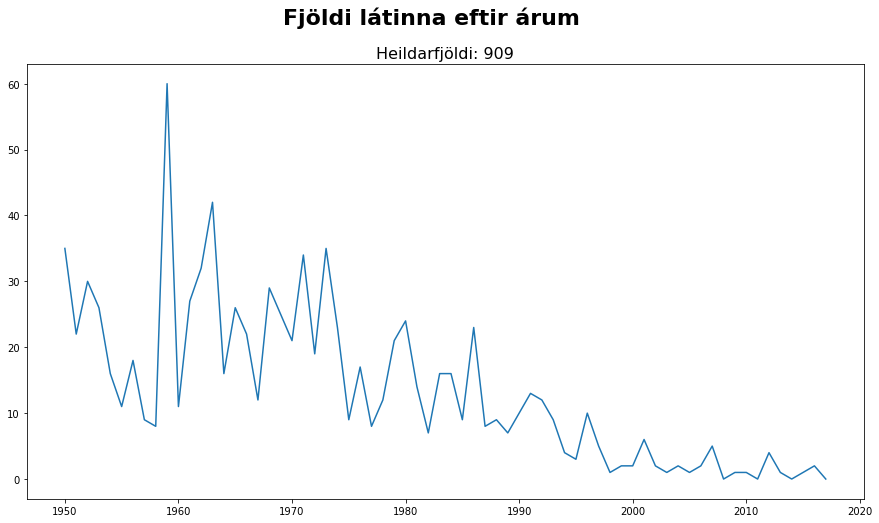

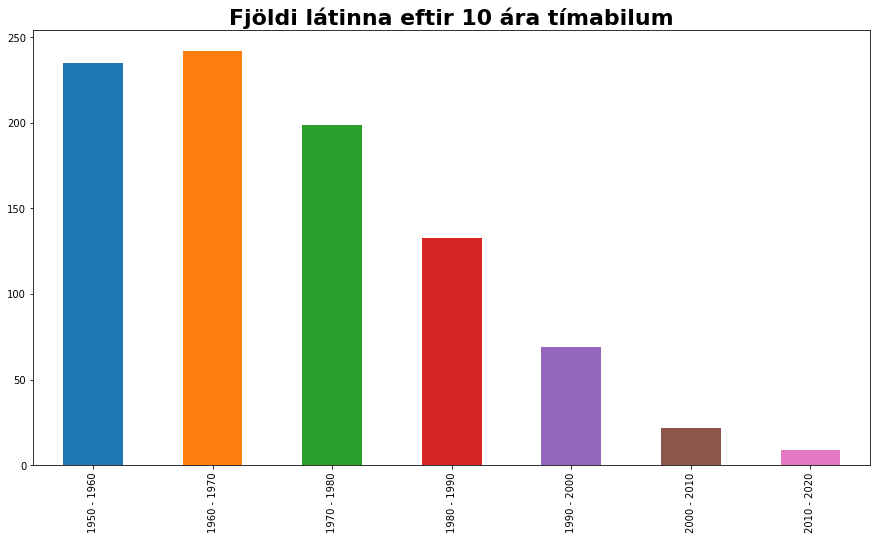

In [6]:
deathByYearGroups = df.groupby(df.index.year)

deathByYearX = []
deathByYearY = []

# This for loop is to make sure we also plot the few years where no one did die
for i in range(1950, 2018):
    deathByYearX.append(i)
    if i in deathByYearGroups['Nafn'].groups:
        deathByYearY.append(len(deathByYearGroups['Nafn'].groups[i]))
    else:
        deathByYearY.append(0)
        
# Plotting the graph
plt.rc('figure', figsize=(15, 8))
plt.plot(deathByYearX, deathByYearY)
plt.title('Heildarfjöldi: ' + str(len(df.index)), fontdict={'size': 16})
plt.suptitle('Fjöldi látinna eftir árum', fontsize=22, fontweight='bold')
plt.show()


# This code is used to count how many have died on a ten year period
deathByTenYear = []
tempCounter = 0
tempVar = 0

for i, death in enumerate(deathByYearY):
    if tempCounter is 10 or i is len(deathByYearY)-1:
        deathByTenYear.append(tempVar)
        tempCounter = 0
        tempVar = 0
    tempVar+= death
    tempCounter += 1

yearLables = [] 
year = 1950

for years in deathByTenYear:
    yearLables.append(str(year) + ' - ' + str(year + 10))
    year += 10
yearLables

yearSeries = pd.Series(deathByTenYear, index=yearLables)

yearSeriesPlot = yearSeries.plot(kind='bar')
yearSeriesPlot = yearSeriesPlot.set_title('Fjöldi látinna eftir 10 ára tímabilum', fontdict={'size': 22, 'weight':'bold'})

### Með hvaða hætti látast sjómenn? / How do sailors perish?

**_Icelandic:_**   
Ef við skoðum nánar með hvaða hætti sjómenn látast þá kemur það kannski lítið á óvart að flestir látast með skipum sem farast. En það sem er merkilegra að skoða er hversu margir hafa látist með öðrum hætti, til að mynda hafa um 200 manns fallið fyrir borð, í kringum 120 drukknað í höfn og um 70 látist í vinnuslysum. Þessar tölur verða að teljast sem ansi hátt hlutfall og segir okkur vel hvað sjómannsstarfið er og sérstaklega hefur verið hættulegt fyrir örfáum áratugum síðan.

**_English:_**  
If we look at how sailors perish we discover unsurprisingly that most sailors perish with sinking ships. At the same time it’s interesting to see how many have died by another cause, for example about 200 people have died by falling over board, about 120 drowned in harbour and 70 died in work related accidents. These numbers show high rate which tells us how dangerous the job is and was before. 

Text(0.5,1,'Flokkun atviks')

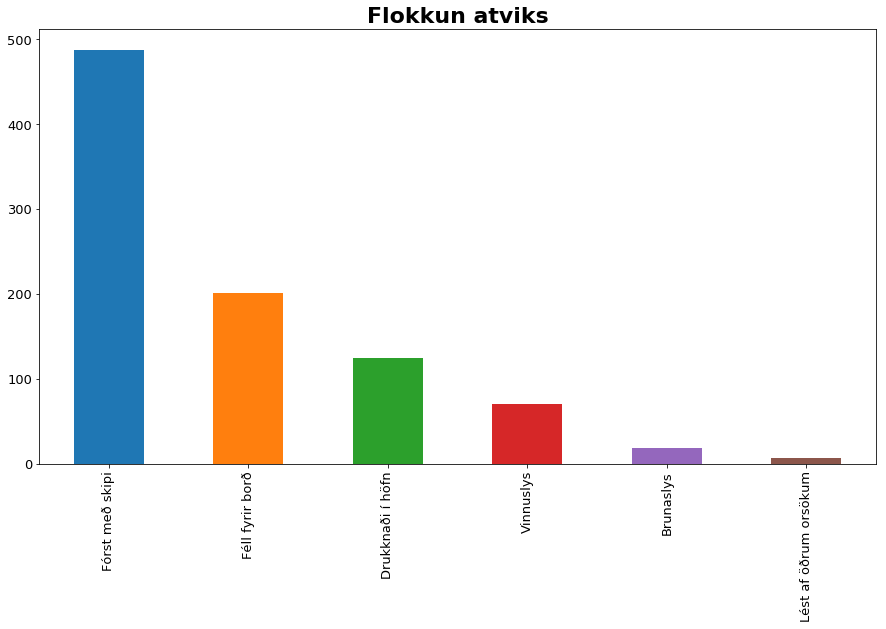

In [7]:
category_plot = df['Flokkun atviks'].value_counts().plot(kind='bar',figsize=(15, 8), fontsize=13)
category_plot = category_plot.set_title('Flokkun atviks', fontdict={'size': 22, 'weight':'bold'})
category_plot

### Hlutfall milli karla og kvenna / Proportion between man and women

**_Icelandic:_**   
Í gögnunum er ekki að finna beinar upplýsingar um kyn þeirra sem hafa látist en við getum notað ýmsar aðferðir til að flokka gögnin eftir kyni. Þegar um íslensk nöfn er að ræða er einfaldast að athuga hvort nöfnin enda á _'son'_ eða _'dóttir'_ en í sumum tilfellum dugar það ekki, þess vegna sækjum við upplýsingar um öll karlmannsnöfn og prófum að bera saman við það. Enn standa þó örfá tilfelli fyrir utan og þá er oftast um útlensk nöfn að ræða, sem eru síðan handflokkuð í þessu verkefni og þegar nöfnin eru skoðuð má sjá að þau virðast öll vera karlmannsnöfn.

**_English:_**  
In the we don’t have good information about the gender of the sailors but we can use a few different methods to get that information to spilt it by gender. With Icelandic names it’s easy to check if the name ends with _’son’_ or  _’dóttir’_ (daughter) but in some cases that is not enough, that’s why we compare all male names with all allowed Icelandic male names. Still there are some edge cases that stand out, most likely not Icelandic names, by looking at the few names left we can sort them by hand (they all seem to be male).

Óflokkuð nöfn:  ['Sofus Morten Dalberg', 'Leif Mohr', 'Daniel Tausen', 'Kaz Imierz Walerian Gron', 'Tomas Jespersen', 'Ulrick Hansen', 'Arnfinn Jörensen', 'Holberg Bernhardsen', 'Niels Jul Haraldsen', 'Jaib Abdelouahd - Marokkóbúi']


Text(0.5,1,'Hlutföll kynja')

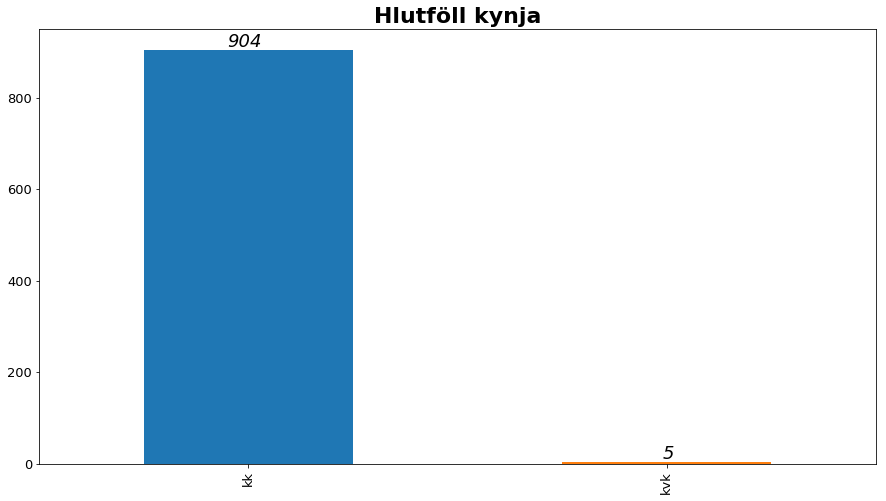

In [8]:
# We use BeautifulSoup to get all the icelandic male names to sort out edge cases were names don't end wit 'son'
allMaleNames = []
request = r.get('https://www.island.is/mannanofn/leit-ad-nafni/?Stafrof=&Nafn=&Drengir=on&Samthykkt=yes')
soup = BeautifulSoup(request.content, 'html.parser')
headDiv = soup.findAll('div', {'class': 'nametype'})
lists = headDiv[0].findAll('ul', {'class': 'dir'})

for singleList in lists:
    items = singleList.findAll('li')
    for item in items:
        # On the site we have edge cases were li includes the string 'úrsk.' that we want to ignore
        if 'úrsk.' not in item.text:
            allMaleNames.append(item.text.strip())
   

# Counting male and female names
maleCount = 0
femaleCount = 0
oddCases = []
sexList = []
        
for name in df['Nafn']:
    if name.endswith('dóttir'):
        femaleCount += 1
        sexList.append('kvk')
    elif name.endswith('son'):
        maleCount += 1
        sexList.append('kk')
    else:
        # Split names into parts to 
        nameParts = name.split()
        for i, part in enumerate(nameParts):
            if part in allMaleNames:
                maleCount += 1
                sexList.append('kk')
                break
            elif i is len(nameParts)-1:
                oddCases.append(name)
                sexList.append('NA')
                
print('Óflokkuð nöfn: ', oddCases)

# After looking at the odd names we assume they are male
sexList = ['kk' if x == 'NA' else x for x in sexList]
df['Kyn'] = sexList

sex_plot = df['Kyn'].value_counts().plot(kind='bar',figsize=(15, 8), fontsize=13)


p1 = sex_plot.patches[0]
p2 = sex_plot.patches[1]
sex_plot.annotate(str(p1.get_height()), (p1.get_x() + 0.2, p1.get_height() + 7), fontsize=18, style='italic')
sex_plot.annotate(str(p2.get_height()), (p2.get_x() + 0.24, p2.get_height() + 7), fontsize=18, style='italic')
sex_plot = sex_plot.set_title('Hlutföll kynja', fontdict={'size': 22, 'weight':'bold'})

sex_plot

### Hver var aldur sjómanna sem hafa farist? / At what age have sailors perished?

**_Icelandic:_**   
Þegar skoðað er hversu gamlir sjómenn eru þegar þeir hafa farist þá eru það oftast ungir menn. Þetta gæti verið endurspeglun af því að yngri menn hafi oftar verið til sjós þó svo að stéttin hafi elst eitthvað undanfarin ár. Það má einnig sjá í gögnunum að meðalaldurinn er _34_ ára  en algengasta dánaraldur er _20_ ára.

**_English:_**  
When we look at how old the sailors are when they perish we discover that they are often quite young. This is likely to be because often a lot of young men work at see, specially few decades ago. We can see that the average age is _34_ years old and the most common age is _20_ years old.

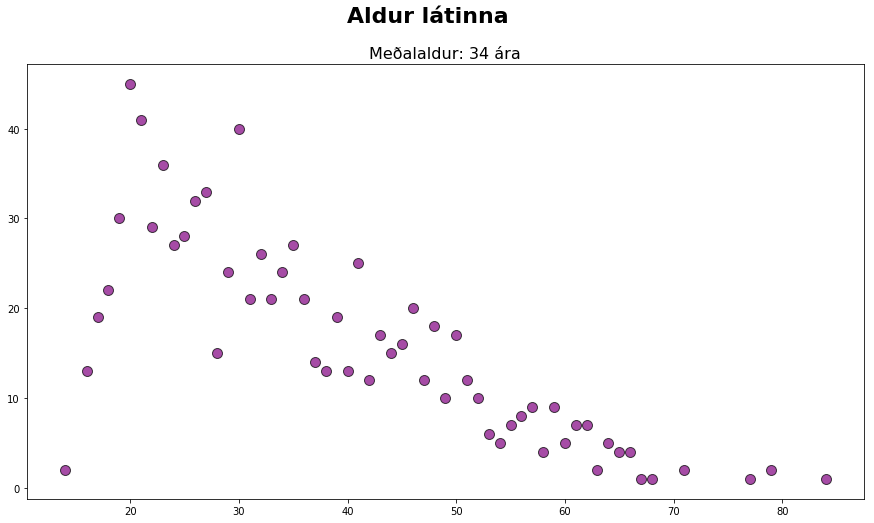

In [9]:
# Counting age and plotting as scatter plot
age_count = df['Aldur'].value_counts()
y = age_count.values
x = age_count.index
plt.rc('figure', figsize=(15, 8))
plt.scatter(x, y, s=100, alpha=0.7, c='purple', edgecolor='k')
plt.title('Meðalaldur: ' + str("{0:.0f}".format(round(df['Aldur'].mean(),0)) ) + ' ára', fontdict={'size': 16})
plt.suptitle('Aldur látinna ', fontsize=22, fontweight='bold')
plt.show()

### Hversu mörg skip hafa farist? / How many ships have sunk?

**_Icelandic:_**   
Ef við skoðum hversu mörg skip hafa farist við landið þar sem banaslys hefur orðið á fólki, þá má sjá að þau eru 169 talsins frá 1950. Hámarkið er í kringum 1960 þar sem 10 skip eða bátar fórust við landið. Árið 2001 fórust 3 skip en síðan þá hefur aldrei farist meira en eitt á ári og oft ekkert.  

**_English:_**  
If we look at how many ships have sinked where casualties have occurred the count is 169 ships form 1950. The maximum was 1960 when 10 ships or boats sunk by the Icelandic coast. The year 2001 3 ships sunk but since then there as never been more than one per year and sometimes less.

In [10]:
# Make a copy of the previous dataframe
shipDf =  df.copy()

# Only want to keep the values where a ship as been lost
shipDf = shipDf[shipDf['Flokkun atviks'] == 'Fórst með skipi']

# Drop unnecessary columns
shipDf = shipDf.drop(['Nafn', 'Aldur', 'Kyn', 'Flokkun atviks'], axis=1)

# Only want to keep the information about the ships and the count of dead
countList = shipDf.groupby(['Dagsetning', 'Skip']).size()
shipDf = shipDf.groupby(['Dagsetning', 'Skip']).first()
shipDf['Fjöldi látinna'] = countList

shipDf = shipDf.reset_index(drop=False)
shipDf = shipDf.set_index('Dagsetning')
shipDf.head()

Skip     Tegund Undirflokkur     Brl    Lgd Smíðaár  \
Dagsetning                                                                 
1950-01-07       Helgi VE  Fiskiskip          NaN     NaN  25.78    1939   
1950-01-28         Vörður  Fiskiskip       Togari  625.00  57.15    1936   
1950-03-04  Jón Magnússon  Fiskiskip          NaN    5.95  20.72    1946   
1950-11-30         Trilla  Fiskiskip          NaN     NaN    NaN     NaN   
1950-12-07         Trilla  Fiskiskip          NaN     NaN    NaN     NaN   

            Efni  Fjöldi látinna  
Dagsetning                        
1950-01-07   Eik              10  
1950-01-28  Stál               5  
1950-03-04   Eik               6  
1950-11-30   NaN               2  
1950-12-07   NaN               3

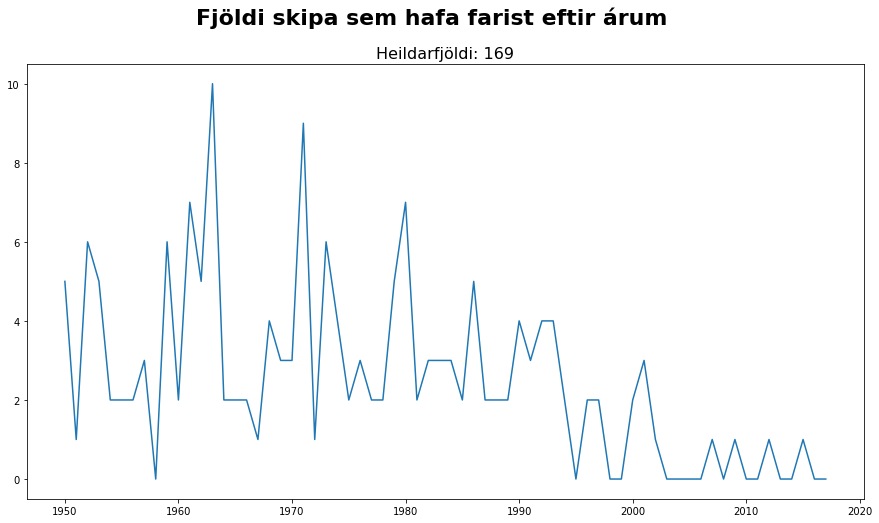

In [11]:
shipsByYear = shipDf.groupby(shipDf.index.year)

shipsByYearX = []
shipsByYearY = []

# This for loop is to make sure we also plot the few years where no one did die
for i in range(1950, 2018):
    shipsByYearX.append(i)
    if i in shipsByYear['Skip'].groups:
        shipsByYearY.append(len(shipsByYear['Skip'].groups[i]))
    else:
        shipsByYearY.append(0)

# Plotting the graph
plt.rc('figure', figsize=(15, 8))
plt.plot(shipsByYearX, shipsByYearY)
plt.title('Heildarfjöldi: ' + str(len(shipDf.index)), fontdict={'size': 16})
plt.suptitle('Fjöldi skipa sem hafa farist eftir árum', fontsize=22, fontweight='bold')
plt.show()

### Hversu gömul eru skipin þegar þau farast? / How old are the ships when they sink?

**_Icelandic:_**   
Þegar skoðaður er aldur skipa þegar þau farast má sjá að ekki virðist vera mikil fylgni milli þess að skip séu gömul og séu að farast þess vegna. Þó ert vert að taka það fram að í gögnunum eru engar upplýsingar um skip á sjó sem fórust ekki og líklegt er að fylgni sé milli aldurs þeirra skipa sem farast og aldurs skipa í sjó yfir höfuð. Ekki öll skip á gögnunum hafa upplýsingar um hvenær þau eru smíðuð svo í þessu tilfelli vinnum við bara með þau gögn sem við höfum. 

**_English:_**  
When looking at the age of the ships when they sink we see can see that there is not a big connection between the age and sinking ships. It’s worth mentioning that we don’t have any information in the dataset about how old other ships on sea at the same time, it’s likely that there is a connection between how old the ships that sink are and how old the ships at sea are. Not all ships in the dataset have information on how old they are when the sink and in this case we only work with the data we have.

Text(0.5,1,'Aldur skipa \n')

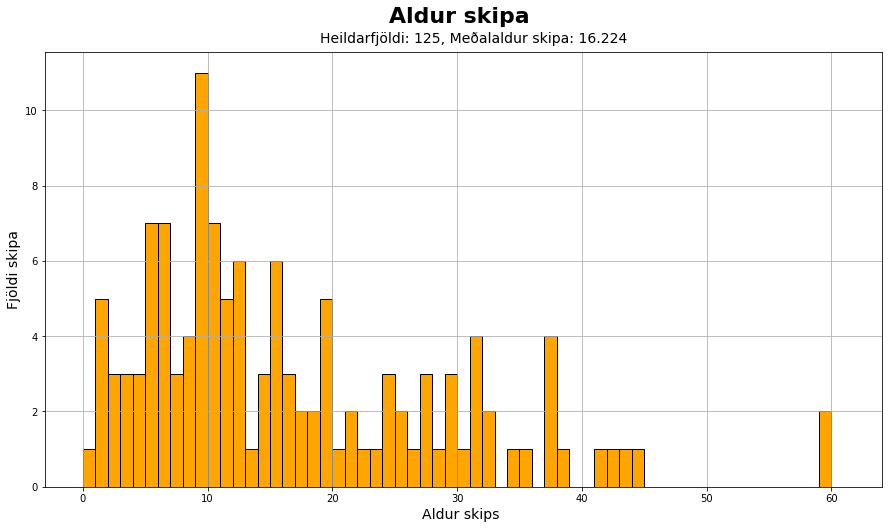

In [12]:
ship_age = pd.to_numeric(shipDf['Smíðaár'], errors='coerce').dropna()

# Calculate the ship age
for date, val in ship_age.iteritems():
    ship_age[date] = date.year - val


# Plotting and customizing the graph 
bin_range = np.arange(0, 62, 1)
ship_age_plot = ship_age.plot.hist(grid=True, alpha=1, color='orange', histtype='bar', ec='black', bins=bin_range)
ship_age_plot.set_xlabel('Aldur skips ', fontsize=14)
ship_age_plot.set_ylabel('Fjöldi skipa', fontsize=14)
ship_age_plot.text(19, 11.8, 'Heildarfjöldi: ' + str(ship_age.count()) + ', Meðalaldur skipa: ' + str(ship_age.mean()), fontsize=14)
ship_age_plot.set_title('Aldur skipa \n', fontdict={'size': 22, 'weight':'bold'})

### Tegundir skipa / Ship types

**_Icelandic:_**   
Þegar tegundir skipanna eru skoðaðar má sjá að langflest skipanna hafa verið fiskiskip sem kemur svo sem ekki mikið á óvart og endurspeglar líklega þau skip sem hafa verið á sjó í hvert skipti. 

**_English:_**  
When looking at the ship types we can see that most of the ships are fishing ships which is not surprising and likely reflects the ships  at sea at the time.

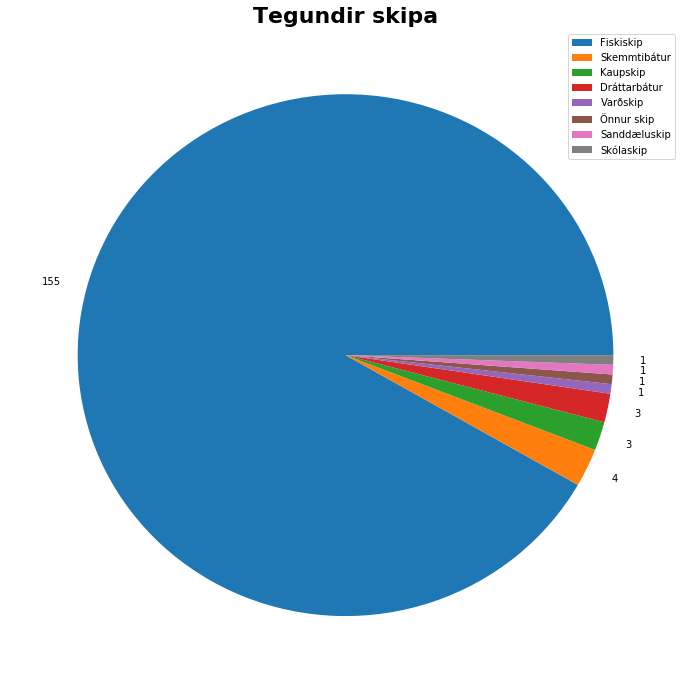

In [13]:
ship_type_count = shipDf['Tegund'].value_counts()
ship_type_keys = ship_type_count.keys()
ship_type_values = ship_type_count.values
plt.rc('figure', figsize=(12, 12))
plt.pie(ship_type_values, labels=ship_type_values)
plt.title('Tegundir skipa', fontsize=22, fontweight='bold')
plt.legend(ship_type_keys,loc=1)
plt.show()

**_Icelandic:_**  
Ef stærð skipa er skoðuð út frá lengd og þyngd kemur í ljós að í flestum tilfellum eru það minni bátar undir 20 metrum að lengd sem farast, þó svo að stærri skip hafi farist í einhverjum tilfellum. Stærsta skip sem hefur farist og leitt til banaslys var fragtskipið Dísarfell í eigu samskipa sem fórst árið 1997, en þar fórust 2 menn en aðrir björguðust.

**_English:_**  
When looking at the size of the ships by length and weight we see that in most cases it’s boats under 20 meters that sink, but sometimes they are bigger. The biggest ship that sunk was Dísarfell  owned by Samskip, in 1997, in that accident 2 men perished others were saved.

![Dísarfell](./disarfell.jpg)

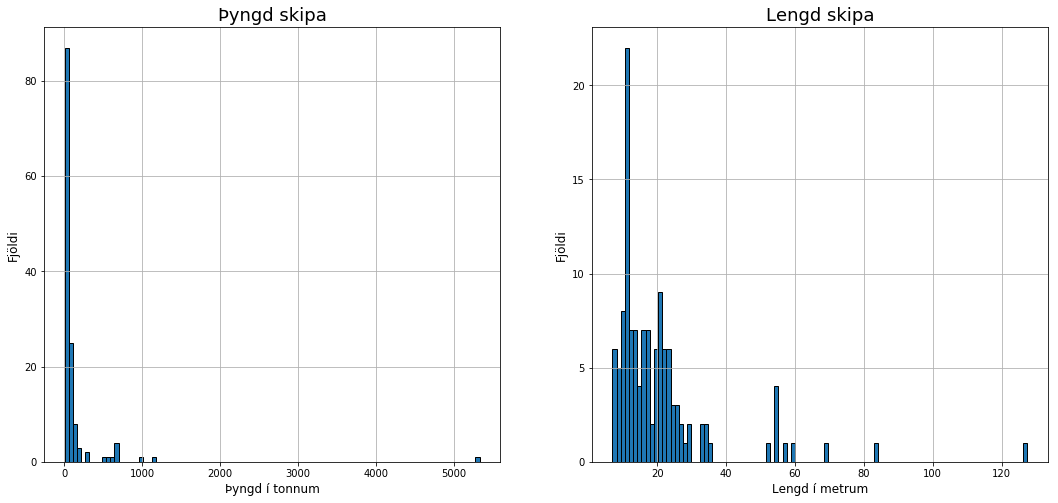

In [14]:
fig, axes = plt.subplots(1, 2)
plot1 = shipDf['Brl'].hist(bins=100, ax=axes[0], figsize=(18,8), histtype='bar', ec='black')
plot1.set_title('Þyngd skipa', fontsize=18)
plot1.set_xlabel('Þyngd í tonnum', fontsize=12)
plot1.set_ylabel('Fjöldi', fontsize=12)

plot2 = shipDf['Lgd'].hist(bins=100, ax=axes[1],histtype='bar', ec='black')
plot2.set_title('Lengd skipa', fontsize=18)
plot2.set_xlabel('Lengd í metrum', fontsize=12)
plot2.set_ylabel('Fjöldi', fontsize=12)
plot2

### Úr hverju er skipin smíðuð? / What type of materials are the ships made with?

**_Icelandic:_**  
Ef við skoðum úr hvaða efni skipin sem hafa farist eru smíðuð og skiptum því niður á 10 ára tímabil má sjá út ýmsa hluti. Til að mynda er einna mest áberandi hvernig skipaflotinn hefur breyst úr því að vera smíðaður úr við, þá helst eik eða blandaðri eik, yfir í stál báta. Það sést greinilega að trébátar hafi farist oftar við Ísland og hægt að velta því fyrir sér hvort betri smíði báta sé ekki einn af stærri þáttum í bættu öryggi sjómanna. Einnig má sjá að enginn trefjaplastbátur virðist hafa farist fyrr en á tímabilinu 1990 - 2000 en þar er helsta ástæðan væntanlega sú að smíði þeirra hafi ekki byrjað fyrr en uppúr 1980 en þeir skipa stóran hluta flotans í dag, þá sérstaklega smábátaflotans. 


**_English:_**  
If we look at what materials the ships are made of and split it into 10 year periods we see a lot of interesting things. For example it is apparent  how the ship materials have changed, from oak or blended oak to steel. It is apparent that boats made from wood have sunk much more often and one might speculate that changes in construction of boats is a big part of better safety for sailors.
We can also observe that no fiber plastic boats sunk until 1990 - 2000 but probably the biggest reason for that there construction did not start until 1980, they make up a big part of the fleet today, specially of the smaller boat fleet.


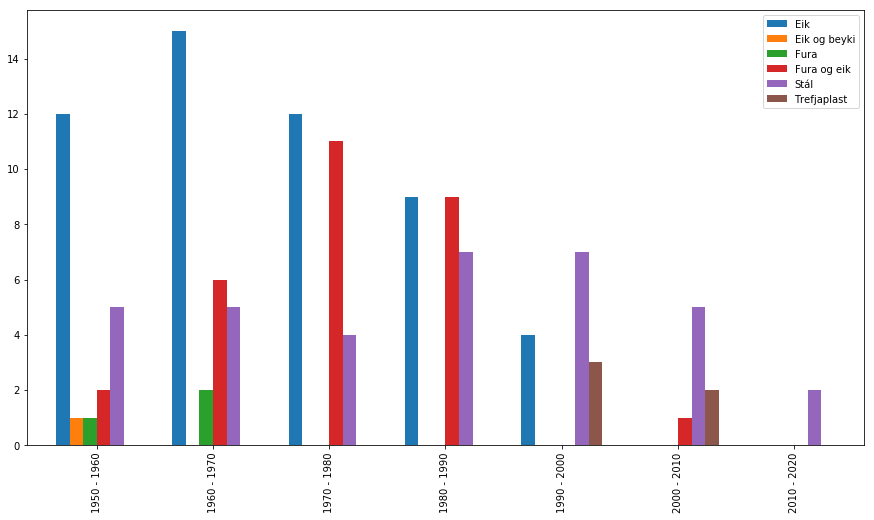

In [15]:
# This code is used to do this 10 years at a time
valueCountList = []

for i in range(1950, 2020, 10):
    valueCountList.append(shipDf[(shipDf.index.year >= i) & (shipDf.index.year < i+10)]['Efni'].value_counts())

yearLables = [] 
year = 1950

for years in deathByTenYear:
    yearLables.append(str(year) + ' - ' + str(year + 10))
    year += 10

pd.DataFrame(valueCountList, index=yearLables).plot.bar(width=0.7, figsize=(15,8))

### Hvaðan koma þau skip sem hafa farist? / From what part of the country do the ships come from?

**_Icelandic:_**  
Í gögnunum eru ekki að finna miklar upplýsingar um hvaðan skipin koma sem hafa farist eða hvar þau hafa farist. En fyrir mörg þeirra höfum við þó í nafninu ákveðnar upplýsingar í einkennisstöfum sem vísa til þeirrar sýslu sem þau koma úr. Sem dæmi má nefna _Haförn SH_ sem fórst árið 1983 en í þessu nafni sjáum við _SH_ sem vísar til _Snæfellsness- og Hnappadalssýsla_. Þetta getum við nýtt okkur til að mynda okkur hugmynd um hvaðan þau koma, þó svo að þau geti hafa verið hvar sem er við landið þegar þau fórust.

**_English:_**  
In the data we do not have a lot of information about what part of the country the ships come from or where they have sunk. But for many of the we have information in the names  about the region identity. For example the ship _Haförn SH_ that sunk in 1983 has the SH which points to the region of _Snæfellsness- and Hnappadalssýslsa_. We can use this get an idea from where they come from, even though could have been anywhere when they sunk.

In [16]:
area_id_df = pd.read_csv('./csv\'s/letterAndArea.csv', header=None, index_col=0, names=['id', 'area'])
area_id_df['area'] = area_id_df['area'].str.strip()
shipAreaList = []

for ship in shipDf['Skip']:
    m = re.search('[A-Z][A-Z]$', ship)
    if m and m.group(0) in area_id_df.index:
        shipAreaList.append(area_id_df.loc[m.group(0)].item())
    else:
        shipAreaList.append('Nan')

shipDf['Sýsla'] = shipAreaList
shipDf.head()

Skip     Tegund Undirflokkur     Brl    Lgd Smíðaár  \
Dagsetning                                                                 
1950-01-07       Helgi VE  Fiskiskip          NaN     NaN  25.78    1939   
1950-01-28         Vörður  Fiskiskip       Togari  625.00  57.15    1936   
1950-03-04  Jón Magnússon  Fiskiskip          NaN    5.95  20.72    1946   
1950-11-30         Trilla  Fiskiskip          NaN     NaN    NaN     NaN   
1950-12-07         Trilla  Fiskiskip          NaN     NaN    NaN     NaN   

            Efni  Fjöldi látinna           Sýsla  
Dagsetning                                        
1950-01-07   Eik              10  Vestmannaeyjar  
1950-01-28  Stál               5             Nan  
1950-03-04   Eik               6             Nan  
1950-11-30   NaN               2             Nan  
1950-12-07   NaN               3             Nan

**_Icelandic:_**  
Nú þurfum við að finna upplýsingar um staðsetningu þeirra sýsla sem koma fram í gögnunum og þá má hér að neðan sjá python kóða sem sækir upplýsingar um allar sýslur og kaupstaði á Íslandi frá wikipedia og síðan notum við þau hnit til að teikna inn á kortið að neðan.

**_English:_**  
At this point we need to find information about the location of the regions that we find in the data and in the code cell below we collect information about all Icelandic regions and towns from wikipedia and the use the coordinates to draw on the map below

In [17]:
# Base site
request = r.get('https://en.wikipedia.org/wiki/Counties_of_Iceland')

# Finding links to all counties and towns
soup = BeautifulSoup(request.content, "html.parser")
counties = soup.find(text='The historical counties were:').findNext('ul')
towns = counties.findNext('ul')
counties = counties.findAll('a')
towns = towns.findAll('a')

positions = {}

for a in counties:
    # Open all the countie links
    request = r.get('http://en.wikipedia.org' + urllib.parse.unquote(a['href']))
    en_soup = BeautifulSoup(request.content, "html.parser")
    # Finding the title
    title = en_soup.find('h1').text
    # Find another link where the coordinates are stored as decimals
    geo_href = en_soup.find('span', {'class': 'geo-default'}).parent['href']
    request = r.get('http:' + urllib.parse.unquote(geo_href))
    geo_soup = BeautifulSoup(request.content, "html.parser")
    # Assign the longitude and latitude to our positions dictionary
    latitude = float(geo_soup.find('span', {'class':'latitude'}).text)
    longitude = float(geo_soup.find('span', {'class':'longitude'}).text)
    positions[title] = [latitude, longitude]
    
    
# Similar to the code above but a little work around because 
# not all towns on the site include coordiante information
for a in towns:
    request = r.get('http://en.wikipedia.org' + urllib.parse.unquote(a['href']))
    soup = BeautifulSoup(request.content, "html.parser")
    geo_href = soup.find('span', {'class': 'geo-default'})
    if geo_href:
        title = soup.find('h1').text
        request = r.get('http:' + urllib.parse.unquote(geo_href.parent['href']))
        geo_soup = BeautifulSoup(request.content, "html.parser")
        latitude = float(geo_soup.find('span', {'class':'latitude'}).text)
        longitude = float(geo_soup.find('span', {'class':'longitude'}).text)
        positions[title] = [latitude, longitude]

**_Icelandic:_**  
Hérna teiknum við síðan kort af Íslandi og inn á það hnit þeirra sýsla sem við höfum upplýsingar um að bátar hafi farist frá.

**_English:_**  
Here we then draw a map of Iceland and then put the coordinates of the regions that we information about in the data.

http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=242670.77780875342,292960.9378211689,778347.5118613883,720296.6393059522&bboxSR=3057&imageSR=3057&size=2000,1595&dpi=96&format=png32&f=image


/Users/Bensi/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/Bensi/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/Bensi/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/Bensi/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


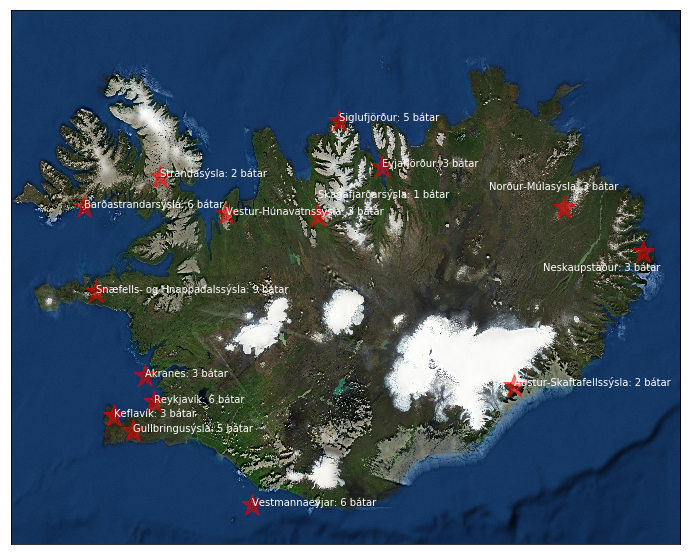

In [18]:
westlimit=-24.09
southlimit=63.05
eastlimit=-12.65
northlimit=66.85

# Draw the map with real image projection
basemap = Basemap(projection='mill',resolution='h', llcrnrlat=southlimit, urcrnrlat=northlimit, llcrnrlon=westlimit, urcrnrlon=eastlimit, epsg=3057)
basemap.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 2000, verbose= True)

area_count = shipDf['Sýsla'].value_counts()


# Printing coordinates, labels and ship count to the screen
# We also a few if statement to change positions of few ill-fitting labels
for key in area_count.index.tolist():
    if key == 'Nan':
        continue
    val = area_count[key]
    x,y = basemap(positions[key][1], positions[key][0])
    basemap.plot(x, y, color='red', marker='*', markersize=24, alpha=0.5)
    if key == 'Neskaupstaður':
        plt.text(x - 80000, y - 15000, (str(key) + ': ' + str(val) + ' bátar'), color='white')
    elif key == 'Skagafjarðarsýsla':
        plt.text(x, y + 15000, (str(key) + ': ' + str(val) + ' bátar'), color='white')
    elif key == 'Norður-Múlasýsla':
        plt.text(x - 60000, y + 15000, (str(key) + ': ' + str(val) + ' bátar'), color='white')
    else:
        plt.text(x, y, (str(key) + ': ' + str(val) + ' bátar'), color='white')
plt.show()

**_Icelandic:_**  
Ef við skoðum kortið hér að ofan má sjá að dreifing þeirra báta sem hafa farist er nokkuð jöfn um landið. Þó má sjá að mest af bátum viðist hafa farið við vesturströnd landsins eða frá Vestmanneyjum og upp að Barðarstrandarsýslu og mest í Snæfells- og Hnappadalssýslu. Líklegasta ástæða fyrir þessari dreifingu er einfaldlega að á þessum stöðum hefur ávallt verið mest af bátum. Einnig má taka það fram að ekki eru upplýsingar í gögnunum um sýslu næstum allra skipanna og því eru þessar niðurstöður ekki full marktækar þó svo þær gefi hugmynd.

**_English:_**  
If we look at the map above we see that the distribution of sunken ships around the coast is similar. But we see that most of the boats come from the west coast or from Westman Islands up to Westfjords and most from _Snæfells- and Hnappadalssýsla_. The most likely reason fro this distribution is that there has always been a lot more boats in these areas than others. It is also worth mentioning that the entries in the dataset with this information are few so it is not significant but it can give a rough idea.

### Fjöldi látinna með hverju skipi / Count of person loss in each accident

**_Icelandic:_**  
Ef við skoðum hversu margir hafa látist í hverju slysi má sjá mikla fækkun og frá því í kringum 1990 hafa mest 3 látist í slysi þó svo að slysin hafi verið fleiri. Þetta má rekja til betri öryggis- og björgunarbúnaðar ásamt mikið öflugri viðbragðsaðila á borð við Landhelgisgæslu Íslands. 


**_English:_**  
If we look at the count of casualties in each accident we can see that a lot less people die in each accident and from 1990 there has never been more than  3 casualties in an accident even though the number of accidents has sometimes been higher. The reason can be traced to better safety and lifesaving equipment along with better response teams like the Icelandic Coast Guard. 


![Landhelgisgæsla Íslands](http://www.lhg.is/media/skip/thor/large/_MG_1135.jpg)

Text(0.5,0,'Dagsetning slys')

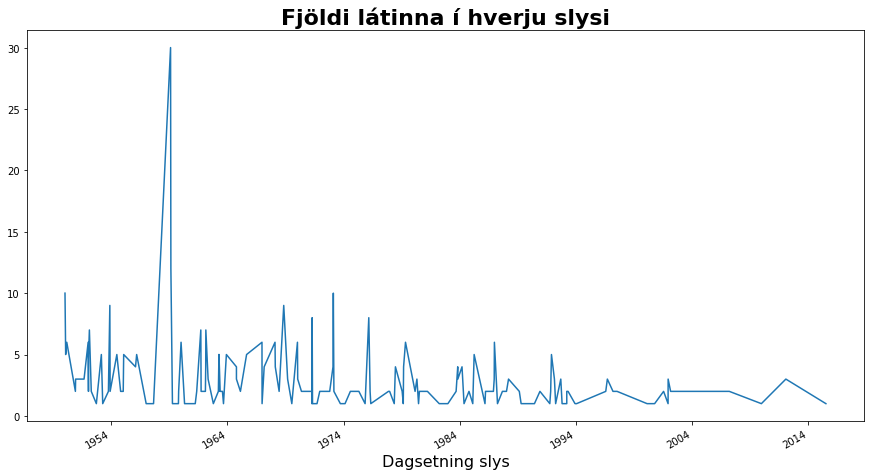

In [19]:
dead_count_plot = shipDf['Fjöldi látinna'].plot(figsize=(15, 8))
dead_count_plot.set_title('Fjöldi látinna í hverju slysi', fontsize=22, fontweight='bold' )
dead_count_plot.set_xlabel('Dagsetning slys', fontsize=16)

## Tenging milli veðurfars og slysa / Connection between weather and accidents

**_Icelandic:_**  
Það liggur nokkuð augljóst fyrir að slæmt veðurfar eykur talsvert hættuna á slysum, þá sér í lagi mikill vindur sem veldur hárri ölduhæð, en einnig, skyggni eða samspil raka og hitastigs sem getur valdið ísingu á skipunum. Hér að neðan eru skoðuð tvö mismunandi gagnasett tengd veðri. Það fyrra eru veðurupplýsingar hvers dags fyrir sig frá árinu 1997 og er byggt á upplýsingum vefsíðunni [Weather underground](https://www.wunderground.com). Það seinna eru meðaltöl eftir mánuðum frá árinu 1949 og til dagsins í dag og er frá [Veðurstofu Íslands](http://www.vedur.is/).  
  
Þar sem við höfum ekki gögn yfir það hvar skipin hafa farist miðast allar upplýsingar við Reykjavík. Þó svo að veðurskilyrði virðist góð þá er auðvitað sá möguleiki fyrir hendi að allt önnur skilyrði hafi verið þar sem skipið fórst. 


**_English:_**  
It is obvious that bad weather increases the risk of accidents, specially when there is a lot of wind that causes bigger waves, but also, visibility or the connection between humidity and temperature that that can cause icing on the ships. Below there are two different dataset fro weather information. The first one is based on information about each day and is from [Weather underground](https://www.wunderground.com). The latter one includes the average by each month from the year 1949 until the present day and is from [Icelandic Met Office](http://www.vedur.is/).

Because we do not  have data over where the ships have sunken all weather data is based from the capital, Reykjavík. This means that even though the weather in Reykjavík was good there could have been a lot different weather where the ship was.

![bræla](https://i.pinimg.com/originals/4e/71/89/4e7189836f674b235db02fa8437c5318.jpg)

In [20]:
# Reading in from multiple csv files
df_list = []
names = ['Dagsetning', 'Meðalhiti (°C)', 'Hámarkshiti (°C)', 'Lámarkshiti (°C)', 'Raki', 'Úrkoma (mm)', 'Loftþrýstingur (hPa)', 'Vindhraði (m/s)', 'Hámarskvindshraði (m/s)', 'Skyggni (km)']

for i in range(1997, 2018):
    year_frame = pd.read_csv('./csv\'s/' + str(i) + '.csv', index_col=0, header=None, names=names)
    df_list.append(year_frame)
    
weather_by_day_df = pd.concat(df_list)
weather_by_day_df.index =  pd.to_datetime(weather_by_day_df.index, format='%d/%m/%Y')

# Changeing km/h to m/s
weather_by_day_df['Vindhraði (m/s)'] = ((weather_by_day_df['Vindhraði (m/s)'] * 1000) / 3600).round(3)
weather_by_day_df['Hámarskvindshraði (m/s)'] = ((weather_by_day_df['Hámarskvindshraði (m/s)'] * 1000) / 3600).round(3)
weather_by_day_df.head()

Meðalhiti (°C)  Hámarkshiti (°C)  Lámarkshiti (°C)  Raki  \
Dagsetning                                                             
1997-01-01               3                 4                 2  93.0   
1997-01-02               4                 4                 3  98.0   
1997-01-03               2                 3                 2  90.0   
1997-01-04               2                 3                 0  86.0   
1997-01-05              -2                -1                -2  88.0   

            Úrkoma (mm)  Loftþrýstingur (hPa)  Vindhraði (m/s)  \
Dagsetning                                                       
1997-01-01          0.0               1031.39            3.611   
1997-01-02          0.0               1032.67            1.111   
1997-01-03          0.0               1029.87            1.111   
1997-01-04          0.0               1025.43            2.500   
1997-01-05          0.0               1024.70            1.389   

            Hámarskvindshraði (m/s)  Skyggni (km)  
Dagsetning                                         
1997-01-01                    5.556           9.7  
1997-01-02                    2.500           9.7  
1997-01-03                    2.500           9.6  
1997-01-04                    5.000           8.0  
1997-01-05                    3.056           9.9

In [21]:
names = ['Meðalhiti (°C)', 'Meðalhámarkshiti (°C)', 'Hæsti hiti (°C)', 'Meðallágmarkshiti (°C)', 'Lægsti hiti (°C)', 'Meðalrakastig', 'Heildar úrkoma', 'Meðalloftþrýstingur (hPa)', 'Meðalvindur (m/s)']
weather_by_month_df = pd.read_csv('./csv\'s/reykjavik_man_medal.csv')
weather_by_month_df['Mánuður/ár'] = pd.to_datetime(weather_by_month_df.ár*100+weather_by_month_df.mán, format='%Y%m')
weather_by_month_df.index = weather_by_month_df['Mánuður/ár']

# Dropping unnecessary columns 
weather_by_month_df = weather_by_month_df.drop(['stöð', 'ár', 'mán', 'txxD1', 'Mánuður/ár', 'tnnD1', 'rx', 'rxD1', 'n', 'sun'], axis=1)
weather_by_month_df.columns = names
weather_by_month_df.head()

Meðalhiti (°C)  Meðalhámarkshiti (°C)  Hæsti hiti (°C)  \
Mánuður/ár                                                           
1949-01-01            -2.7                    0.5              6.6   
1949-02-01             0.0                    2.5              7.8   
1949-03-01             0.1                    2.8              7.4   
1949-04-01            -0.0                    3.1              6.6   
1949-05-01             3.6                    7.2             13.0   

            Meðallágmarkshiti (°C)  Lægsti hiti (°C)  Meðalrakastig  \
Mánuður/ár                                                            
1949-01-01                    -6.8             -15.2           81.0   
1949-02-01                    -2.5              -7.5           87.0   
1949-03-01                    -2.9             -14.3           86.0   
1949-04-01                    -2.9              -8.9           77.0   
1949-05-01                     0.3              -5.0           70.0   

            Heildar úrkoma  Meðalloftþrýstingur (hPa)  Meðalvindur (m/s)  
Mánuður/ár                                                                
1949-01-01            68.8                      996.7                8.5  
1949-02-01            80.0                      989.0                9.2  
1949-03-01            58.7                     1010.4                5.9  
1949-04-01            51.8                     1000.2                7.4  
1949-05-01            27.9                     1014.8                6.9

### Hversu mikill vindur er þegar skip farst? / How windy is it when accidents occur?

**_Icelandic:_**  
Ef við skoðum hversu mikill vindur hefur verið þegar skip frá 1997 hafa farist má sjá að í mörgum tilfellum hefur hann verið talsvert yfir meðallagi en samt sem áður er þó nokkur skipti þar sem vindur virðist hafa verið undir meðallagi. En hafa ber í huga að ekki er um mörg skip að ræða og mælingar miðast eingöngu við Reykjavík.


**_English:_**  
If we look at how much wind has been outside when ships have sunken from 1997 we see that on lot of cases the wind was a lot above average but there are cases where winds was below average. But note that this does not include a lot of ships and the information is only based on Reykjavík 


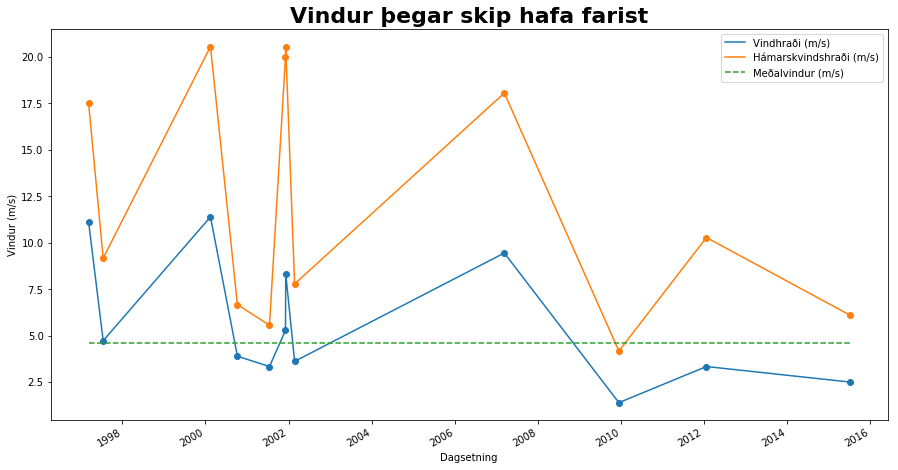

In [22]:
joined_data = shipDf.join(weather_by_day_df, how='inner')
y_mean = pd.Series([weather_by_day_df['Vindhraði (m/s)'].mean()]*len(joined_data), index=joined_data.index)
wind_plot = joined_data.plot(y='Vindhraði (m/s)', marker='o')
wind_plot = joined_data.plot(ax=wind_plot, y='Hámarskvindshraði (m/s)', marker='o')
wind_plot = y_mean.plot(ax=wind_plot, linestyle='--', legend=True, label='Meðalvindur (m/s)', figsize=(15,8))
wind_plot.set_ylabel('Vindur (m/s)')
wind_plot.set_title('Vindur þegar skip hafa farist', fontsize=22, fontweight='bold')
plt.show()

**_Icelandic:_**  
Ef skoðaðar eru veðurathuganir fyrir þá mánuði sem skip fórust í má sjá augljósa tengingu á milli vindasamra mánaða og skipa sem farast. Meðalmánuður þegar skip hefur farist er tæplega 7 m/s á meðan meðalmánuðurinn er í kringum 5,5 m/s. Þetta gildir sérstaklega um þau skip sem fórust fyrr.


**_English:_**  
If we look at weather observations for the months that the ships sunk we can see a clear connection between windy months and sunken ships. The average month when a ship sinks is a little below 7 m/s when the average month is about 5,5 m/s. This is specially true for ships that sunk earlier.


Text(0.5,1,'Vindur í þeim mánuðum sem skip hafa farist')

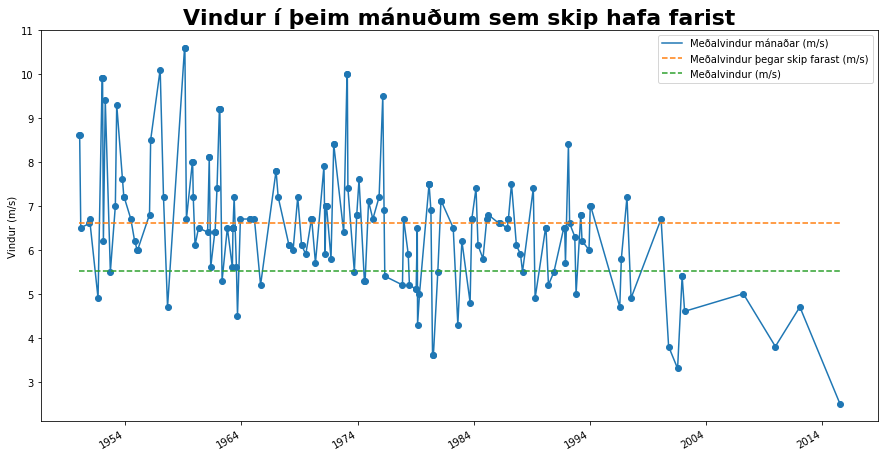

In [23]:
# Make a copy of dataframe to fill in values for each day of month
weather_by_month_copy = weather_by_month_df.copy()

# Get all dates from 1950 to 2018
dates = pd.date_range(shipDf.index[0], shipDf.index[-1], freq='D')
dates.name = 'Mánuður/ár'

# Fill the day values with same values for each day of the month
weather_by_month_copy = weather_by_month_copy.reindex(dates, method='ffill')

# Join and plot the wind data
joined_month = shipDf.join(weather_by_month_copy, how='inner')
y_mean = pd.Series([weather_by_month_df['Meðalvindur (m/s)'].mean()]*len(joined_month), index=joined_month.index)
y_mean_ship_down = pd.Series([joined_month['Meðalvindur (m/s)'].mean()]*len(joined_month), index=joined_month.index)
wind_plot = joined_month['Meðalvindur (m/s)'].plot(marker='o', legend=True, label='Meðalvindur mánaðar (m/s)')
wind_plot = y_mean_ship_down.plot(ax=wind_plot, linestyle='--', legend=True, label='Meðalvindur þegar skip farast (m/s)')
wind_plot = y_mean.plot(ax=wind_plot, linestyle='--', legend=True, label='Meðalvindur (m/s)', figsize=(15,8))
wind_plot.set_ylabel('Vindur (m/s)')
wind_plot.set_title('Vindur í þeim mánuðum sem skip hafa farist', fontsize=22, fontweight='bold')

**_Icelandic:_**  
Í þessu samhengi er áhugavert að skoða í hvaða mánuðum skip farast. Í þessari birtingu sjáum við augljóslega að langflest skipin farast á vetrarmánuðum sem kemur kannski ekki á óvart þar sem veður er verra þá mánuði og meiri hætta á ferð.

**_English:_**  
In connection to this it is interesting to look at in what month most ships sink. In the plot below we see a that unsurprisingly most ships sink in winter when weather is worse.

Text(0.5,1,'Skip sem hafa farist eftir mánuðum')

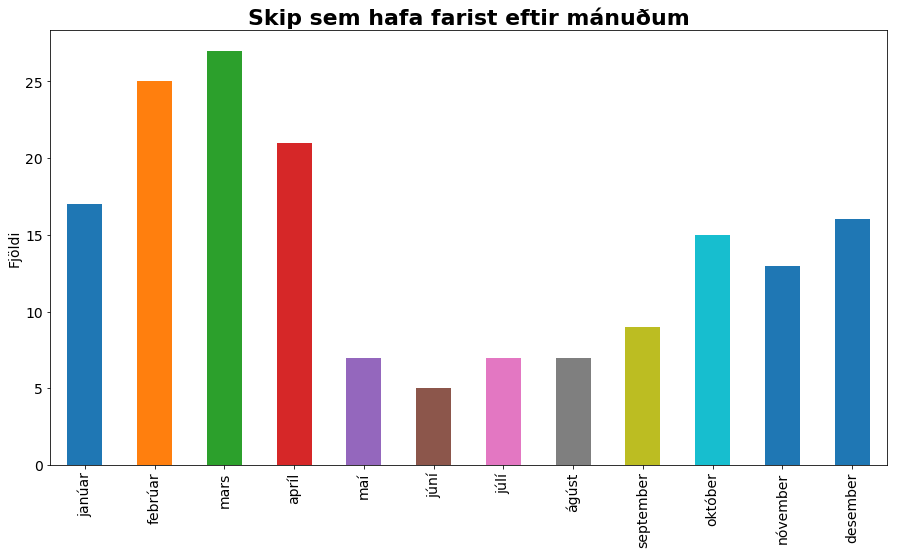

In [24]:
# Name the months
months = ['janúar', 'febrúar', 'mars', 'apríl', 'maí', 'júní','júlí', 'ágúst', 'september', 'október', 'nóvember','desember']

# Count lost ships by months and plot
count_by_month = shipDf.index.month.value_counts(sort=False)
count_by_month.index = months
month_plot = count_by_month.plot(kind='bar', figsize=(15,8), fontsize=14)
month_plot.set_ylabel('Fjöldi', fontsize=14)
month_plot.set_title('Skip sem hafa farist eftir mánuðum', fontsize=22, fontweight='bold')

### Hitastig / Temperature

**_Icelandic:_**  
Ef við skoðum hitastig þeirra mánaða sem skipin hafa farist í má sjá að í fleiri tilfellum hefur mánuðurinn verið nokkuð kaldur þegar skip hefur farist sem passar við greiningu okkar að ofan þar sem skip farast frekar yfir vetrarmánuðina. Þó má sjá að í nokkuð mörgum tilfellum virðist meðalhiti mánaðarins ekki hafa mikið að gera með hvort skip ferst eða ekki.

**_English:_**  
If we look at the temperature in the months that the ships sink we see that in more cases the month has been cold when the ship sinks which fit with or analysis above that ships are more likely to sink in winter. But we also observe a lot of cases where the average temperature does not have a big effect on wether a ships sinks or not.

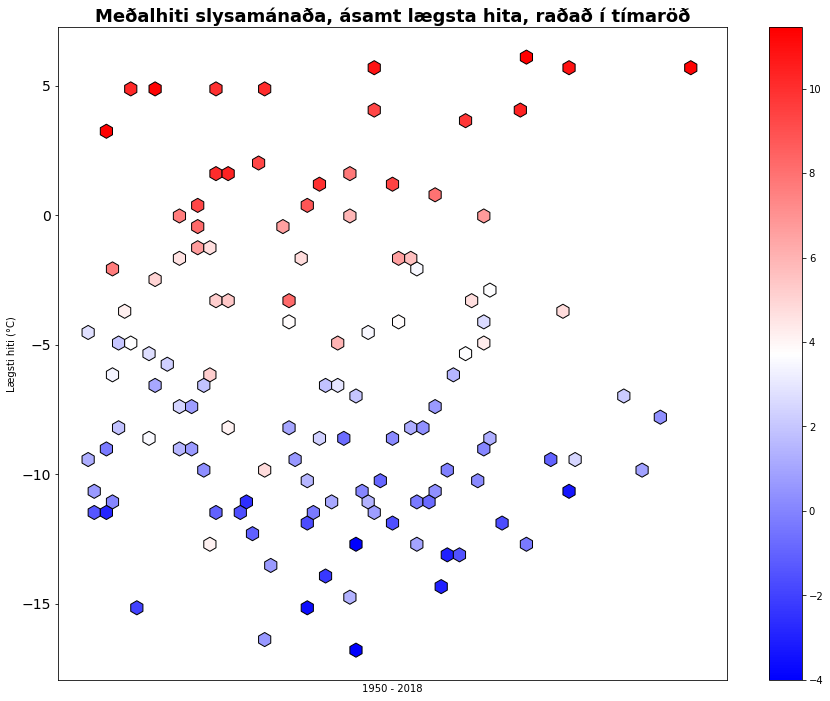

In [25]:
xtic = joined_month.index.year
joined_month['index'] = joined_month.index.astype(np.int64)
cmap = cm.get_cmap('bwr')
heat_plot = joined_month.plot.hexbin(x='index', y='Lægsti hiti (°C)', sharex=False, C='Meðalhiti (°C)', figsize=(15,12), cmap=cmap, gridsize=50, fontsize=14, edgecolor='k')
heat_plot.set_xticks([])
heat_plot.set_xlabel('1950 - 2018')
heat_plot.set_title('Meðalhiti slysamánaða, ásamt lægsta hita, raðað í tímaröð', fontsize=18, fontweight='bold')
heat_plot

### Spá fyrir um hvort skip farist eða maður falli fyrir borð / Predict if ship will sink or loose man overboard

**_Icelandic:_**  
Að ætla að spá fyrir um hvort skip farist eða hverjar líkurnar séu að skip farist með þeim gögnum sem eru fyrir hendi verður aldrei mjög nákvæmt. Helsta ástæða þess er að eftir nákvæma skoðun á gögnunum sést að ekki eru mikið af upplýsingum fyrir hendi sem sýna nægilega mikla fylgni milli þeirra og þess að skip farist. En í fræðilegum tilgangi gerum við heiðarlega tilraun til að vinna með gögnin í þessu samhengi og reyna að spá fyrir um hvort skip farist eða maður falli fyrir borð í ákveðnum mánuði miðað við veðurupplýsingar.eðalhiti mánaðarins ekki hafa mikið að gera með hvort skip ferst eða ekki.

**_English:_**  
To predict if a ship will sink or the odds on a ship sinking with the data we have will not be very precise. The biggest reason for this is that the dataset does not include enough information that shows correlation between the weather data and a sunken ship. But for academic purpose we attempt to work with the data for this purpose and try to predict if a ship will sink or a man will fall overboard in particular month according to weather information.

In [26]:
# Make a copy of the previous dataframe
man_overboard =  df.copy()

# Only want to keep the values where a ship as been lost
man_overboard = man_overboard[man_overboard['Flokkun atviks'] == 'Féll fyrir borð']

# Drop unnecessary columns
man_overboard = man_overboard.drop(['Nafn', 'Aldur', 'Kyn', 'Flokkun atviks'], axis=1)

# Only want to keep the information about the ships and the count of dead
countList = man_overboard.groupby(['Dagsetning', 'Skip']).size()
man_overboard = man_overboard.groupby(['Dagsetning', 'Skip']).first()

man_overboard = man_overboard.reset_index(drop=False)
man_overboard = man_overboard.set_index('Dagsetning')
man_overboard

# Get the dataframes into 1
ship_man_down = pd.concat([shipDf, man_overboard])

# Extract the year and month from the dataframe
year_and_month = np.array((ship_man_down.index.year, ship_man_down.index.month)).T.tolist()

# Data made ready for the neural network 
weather_by_month_data =weather_by_month_df.copy()
weather_by_month_data['Slys'] = [1 if [i.year, i.month] in year_and_month else 0 for i in weather_by_month_data.index]
weather_by_month_data = weather_by_month_data[12:]
weather_by_month_data.head()



Meðalhiti (°C)  Meðalhámarkshiti (°C)  Hæsti hiti (°C)  \
Mánuður/ár                                                           
1950-01-01             2.8                    5.2              9.6   
1950-02-01            -0.7                    2.4              6.1   
1950-03-01             1.3                    4.5              8.3   
1950-04-01             2.2                    5.3              8.3   
1950-05-01             7.1                    9.8             11.6   

            Meðallágmarkshiti (°C)  Lægsti hiti (°C)  Meðalrakastig  \
Mánuður/ár                                                            
1950-01-01                     0.4              -4.3           84.0   
1950-02-01                    -3.4             -13.6           80.0   
1950-03-01                    -1.2              -9.2           80.0   
1950-04-01                    -0.5              -4.9           73.0   
1950-05-01                     4.4              -0.3           76.0   

            Heildar úrkoma  Meðalloftþrýstingur (hPa)  Meðalvindur (m/s)  Slys  
Mánuður/ár                                                                      
1950-01-01           128.3                      996.0                8.6     1  
1950-02-01            30.6                      992.4                6.6     0  
1950-03-01            59.1                     1005.6                6.5     1  
1950-04-01            10.0                     1003.3                6.3     0  
1950-05-01            61.2                     1018.7                6.1     0

**_Icelandic:_**  
Hérna eru við komin með gögnin á form þar sem við höfum allar tölulegar upplýsingar um veður eftir mánuðum ásamt dálknum _'Slys'_ sem táknar hvort slys hafi orðið í tilteknum mánuði þar sem _1_ stendur fyrir að slys hafi orðið en _0_ ekki. Síðan eru 80% af gögnunum tekin af handahófi og notuð til að þjálfa upp tauganet(e. neural network). Þegar tauganetið er tilbúið eru hin 20% af gögnunum tekin prófað hvort spálíkanið spái rétt fyrir um hvort slys hafi orðið í ákveðnum mánuði. Á skífuritunum að neðan má sjá hversu vel spálíkanið spáir.

**_English:_**  
At this point we have the data on numeric form by each month along with the column _’Slys’_ that means that a accident has occurred in particular month if the value is _1_ but not if the value is _0_. Than we use a random 80% of the data to train a neural network. When the neural network is fully trained we use the other 20% to test the how right the prediction is on how likely it is that a accident has occurred in particular month. On the pie plots below ew see how good the prediction is.

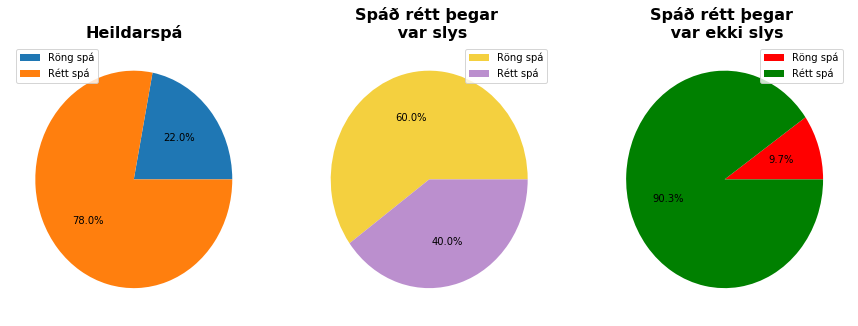

In [27]:
# X and Y to train and test the neural network
df_y = weather_by_month_data.iloc[:, 9:]
df_x = weather_by_month_data.iloc[:, 0:9]
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.20)

# Scale the network so diffrent varibles don't have completely differnet effect
scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)
X_train

# Leyer size for the neural network chosen   and data classified
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 15), max_iter=1000)
mlp.fit(X_train, y_train.values.ravel())
predictions = mlp.predict(X_test)
predictions
y_test

# Data plotted
test_results = y_test.copy()
test_results['Spá'] = predictions

f, axarr = plt.subplots(1, 3, figsize=(15, 5))
result_plot = axarr[0]
result_acc_plot  = axarr[1]
result_not_acc_plot = axarr[2]

rigth_wrong = ['Röng spá', 'Rétt spá']

colors=[['#F4D03F', '#BB8FCE'], ['red', 'green']]

rigth_result = (test_results['Slys'] == test_results['Spá']).value_counts(sort=False)
result_plot.pie(rigth_result, autopct="%.1f%%")
result_plot.set_title('Heildarspá', fontsize=16, fontweight='bold')
result_plot.legend(rigth_wrong)

when_acc = test_results['Slys'] == 1
result_acc = (test_results[when_acc]['Spá']).value_counts()
result_acc_plot.pie(result_acc, autopct="%.1f%%", colors=colors[0])
result_acc_plot.set_title('Spáð rétt þegar \n var slys', fontsize=16, fontweight='bold')
result_acc_plot.legend(rigth_wrong)

when_not_acc = test_results['Slys'] == 0
result_not_acc = (test_results[when_not_acc]['Spá'] == 0).value_counts(sort=False)
result_not_acc_plot.pie(result_not_acc, autopct="%.1f%%", colors=colors[1])
result_not_acc_plot.set_title('Spáð rétt þegar \n var ekki slys', fontsize=16, fontweight='bold')
result_not_acc_plot.legend(rigth_wrong)

plt.show()

### Spá fyrir um efni skipa / Predict ship materials

**_Icelandic:_**  
Í þessum kafla munum við styðjast við ákvörðunartré (e. decision tree) til þess að spá fyrir um úr hvaða efni skip eru smíðuð við byrjum að koma gögnunum yfir á tölulegt form sem tréið getur notað.

**_English:_**  
In this chapter we will use decision tree to predict from what material the ships are made of. We start by getting the data to a numeric form.

In [28]:
# Data made ready for descion tree and ships that have nan in any column dropped
all_ships = df.copy()
all_ships = all_ships.groupby(['Dagsetning', 'Skip']).first()
all_ships = all_ships.reset_index()
all_ships = all_ships.drop(['Nafn', 'Aldur', 'Kyn', 'Flokkun atviks', 'Undirflokkur', 'Skip', 'Dagsetning'], axis=1)
all_ships = all_ships.dropna()
all_ships['Smíðaár'] = all_ships['Smíðaár'].astype(int)
all_ships['Efni'], material_index = pd.factorize(all_ships['Efni'])
all_ships['Tegund'], type_index = pd.factorize(all_ships['Tegund'])

all_ships.head()

Tegund     Brl    Lgd  Smíðaár  Efni
1        0  625.00  57.15     1936     0
3        0    5.95  20.72     1946     1
6        0  656.00  54.00     1947     0
13       0  657.00  54.00     1947     0
14       1  775.00  61.63     1914     0

**_Icelandic:_**  
Hér að neðan er tréið þjálfað með hluta gagnanna og má sjá hér sjá mynd af fyrstu hæðum trésins og lesa út úr henni á hverju tréið er að skipta og hvernig það tekur ákvarðanir um hvar ákveðið skip ætti heima

**_English:_**  
Here below the tree is trained with a part of the data and we can see a graph showing the first levels of the tree and we can read from it what the tree is splitting on and how it decides where particular ship should go.  

In [2]:
# Split to relevant attributes
x = all_ships.iloc[:, 0:4]
y = all_ships.iloc[:, 4:]

# Train the tree
clf = tree.DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)
clf.fit(X_train, y_train)

# Draw the decision tree
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=all_ships.columns.values[:-1],
                         class_names=material_index,
                         filled=True, rounded=True,
                         impurity=False,
                         special_characters=True, max_depth=3)  
graph = graphviz.Source(dot_data)
graph

NameError: name 'all_ships' is not defined

In [1]:
print(y_train)

NameError: name 'y_train' is not defined

**_Icelandic:_**  
Hér má síðan sjá samanburð úr prufu gögnunum og sjá með hversu mikilli nákvæmni tréið spáir fyrir um úr hverju skipið er smíðað.

**_English:_**  
Here we see comparison of train and test data and we can see with how much accuracy the tree predicts the material the ship is made from.

Text(0.5,1,'Samanburður á spá og réttri niðurstöðu \n')

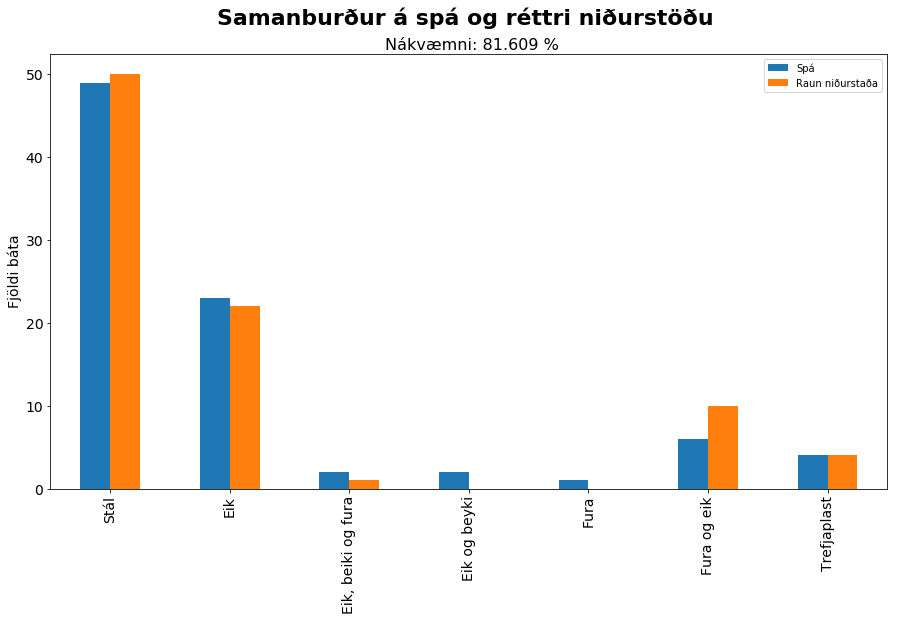

In [30]:
# Count how many predictions are for each varible
predict_dict = collections.Counter(clf.predict(X_test))
y_test_val = y_test['Efni'].value_counts()

# Assign the predictions and real values to lists for dataframe
predict_row = []
real_row = []
for i in range(0,7):
    if i in predict_dict:
        predict_row.append(predict_dict[i])
    else:
        predict_row.append(0)
    if i in y_test_val:
        real_row.append(y_test_val[i])
    else:
        real_row.append(0)
        

# The accuracy measured
percent_string = "{0:.3f}".format(accuracy_score(y_test, clf.predict(X_test))* 100)
        
# Plot the comparison
decision_tree = pd.DataFrame([predict_row, real_row], columns=material_index, index=['Spá', 'Raun niðurstaða'])
decision_tree_plot = decision_tree.T.plot(kind='bar', figsize=(15,8), fontsize=14)
decision_tree_plot.text(2.3, decision_tree.max().max() + 3, 'Nákvæmni: ' + percent_string + ' %', fontsize=16)
decision_tree_plot.set_ylabel('Fjöldi báta', fontsize=14)
decision_tree_plot.set_title('Samanburður á spá og réttri niðurstöðu \n', fontsize=22, fontweight='bold')

## Lokaorð / Conclusion

**_Icelandic:_**  
Ég lærði mikið af verkefninu bæði um hvernig  gott er að skoða og birta gögn en sérstaklega hvað er ótrúlega mikið af upplýsingum í gögnum þó svo að þær séu ekki endilega augljósar í fyrstu. Það er einnig virkilega áhugavert að reyna að setja gagnasett í samhengi við önnur gagnasett.  
  
Sjómennska hefur ávallt verið ein stærsta atvinnugrein Íslands og mikil og stór hluti af Íslandssögunni, ef t.d. er litið á hvernig byggðarlög á Íslandi hafa byggst upp má sjá að nánast allstaðar hefur verið byggt við sjó og höfn er í hverjum bæ. Í svo stórri en samt sem áður hættulegri atvinnugrein er augljóst að öryggi skiptir miklu máli og er mjög jávkætt að sjá augljóslega úr gögnunum mikla framþróun á því sviði.

**_English:_**  
I learned a lot from this assignment, for example good ways to analyse data and display data both also a lot about how much information data can hold that is not obvious at first. It is very interesting to combine datasets for example the main to data with the weather data.

Fishing and sails has always been one of the biggest professions in Iceland and are a big part of Icelandic culture and history, if we for example look at how towns and communities have build up around Iceland we can see that almost all towns are build by the sea and there is a harbour in each town. In a profession which is as large and at the same time risky it is obvious that safety matters a lot and from the data we can see very positive changes in that area.

![Bíldsey SH](http://brimbarinn.123.is/fs/f195b863-033b-4861-9c0c-ffc7442e2bac_M.jpg)